In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as dr
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [120]:
from sklearn.datasets import load_boston


In [202]:
tickers = ['LKOH.L', 'BZ=F']
data = pd.DataFrame(columns = tickers)
for t in tickers :
    data[t] = dr.DataReader(t, data_source = 'yahoo', start = '2021-1-1', end = '2021-6-9')['Adj Close']
data.dropna(inplace = True)

In [203]:
y = data['LKOH.L'].values
X = data[['BZ=F']].values
y

array([71.20536804, 71.20536804, 71.20536804, 72.98200226, 72.98200226,
       74.84841919, 74.84841919, 77.60076904, 80.81710052, 80.77320862,
       80.0426712 , 80.22438812, 78.32601166, 78.32601166, 75.7937088 ,
       74.74730682, 72.80000305, 73.41999817, 72.58999634, 72.58999634,
       73.07800293, 73.96333313, 74.59358215, 75.74630737, 77.31893921,
       77.31893921, 77.31893921, 77.31893921, 77.31893921, 80.4046402 ,
       76.80281067, 76.80281067, 76.80281067, 77.55828857, 77.55828857,
       77.55828857, 79.18299103, 75.98113251, 76.23000336, 76.23000336,
       76.23000336, 76.23000336, 83.04000092, 83.04000092, 85.        ,
       82.85730743, 84.07089233, 86.0617981 , 87.70529938, 87.48039246,
       85.62999725, 83.34999847, 82.47332764, 82.24060059, 82.24060059,
       80.43589783, 80.13670349, 82.06970215, 82.09092712, 81.14362335,
       81.12640381, 80.72167206, 76.59909821, 76.59909821, 76.59909821,
       76.76094818, 77.30999756, 78.51000214, 81.25      , 81.25

In [204]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: 0.57
Intercept: 42.89


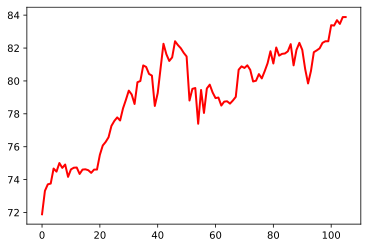

In [205]:

plt.plot(y_pred, color='red', linewidth=2);

In [206]:
tickers = ['BZ=F']
data2 = pd.DataFrame(columns = tickers)
for t in tickers :
    data2[t] = dr.DataReader(t, data_source = 'yahoo', start = '2021-6-10', end = '2021-6-16')['Adj Close']
data2.dropna(inplace = True)
X_new = data2[['BZ=F']].values
print(X_new)
y_new = slr.predict(X_new)
print(y_new)

[[72.22000122]
 [72.51999664]
 [72.69000244]
 [72.86000061]
 [73.98999786]
 [74.38999939]]
[83.88272116 84.05298258 84.14946882 84.24595073 84.88727698 85.11429653]


In [207]:
y_new

array([83.88272116, 84.05298258, 84.14946882, 84.24595073, 84.88727698,
       85.11429653])

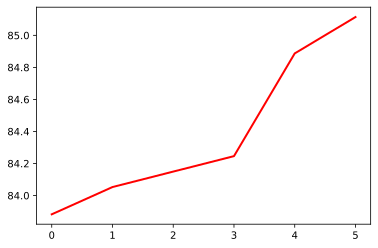

In [208]:
plt.plot(y_new, color='red', linewidth=2);

In [173]:
y

array([ 956.14782715,  993.68457031, 1008.21820068, ..., 6004.5       ,
       5995.        , 5964.5       ])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [127]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2844.373, test: 3165.154
R^2 train: 0.911, test: 0.883


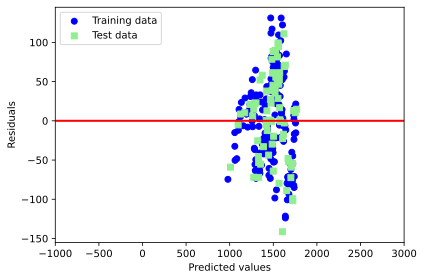

In [129]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=3000, lw=2, color='red')
plt.xlim([-1000, 3000])
plt.tight_layout()

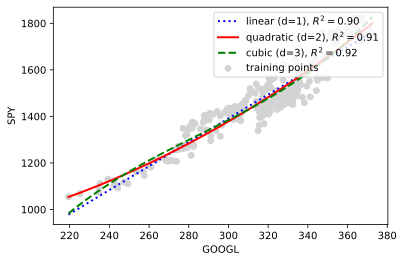

In [130]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('GOOGL')
plt.ylabel('SPY')
plt.legend(loc='upper right')